In [1]:
import numpy as np
from nn_lib import NeuralNetwork, Layer
from activation_functions import *
from matplotlib import pyplot as plt
from loss_functions import MSE

In [134]:
n = 250
d = 2 # features

In [136]:
x, y = np.meshgrid(np.linspace(-1, 1, n), np.linspace(-1, 1, n))
X = np.concatenate((x[..., np.newaxis], y[..., np.newaxis]), axis=2).reshape((n**2, 2))
z = np.cos(X[:, 0]) + np.cos(X[:, 1])

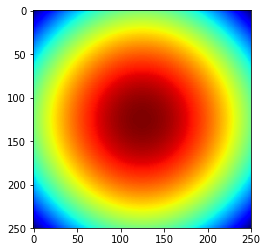

In [137]:
plt.imshow(z.reshape((n, n)), cmap='jet')

In [257]:
nn = NeuralNetwork([Layer(d, 20, Tanh()), Layer(20, 20, Tanh()), Layer(20, 1, Identity())],
                    MSE())

In [258]:
nn.train(X, z[..., np.newaxis], epochs=100, gamma=0.001)

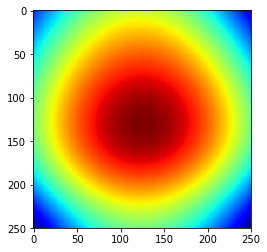

In [259]:
pred = nn(X)[:,0]
plt.imshow(pred.reshape((n,n)), cmap='jet')

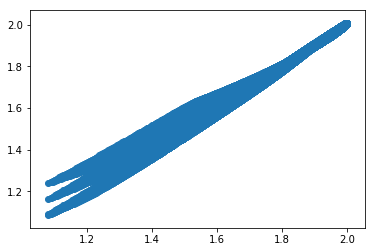

In [260]:
plt.scatter(z, pred)

In [261]:
middle = nn.layers[0](X)

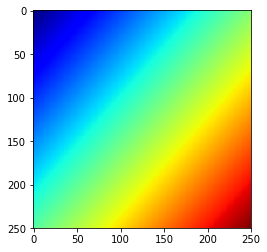

In [262]:
plt.imshow(middle[:, 10].reshape((n, n)), cmap='jet')